
### 1) Data Collection
- Dataset Source - https://data.gov.il/dataset/satisfaction-hosp-general2016
- Raw data contains many rows that are not useful so i created a new one 'modified' by deleting the few columns
- The data consists of 48 column and 11099 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('satisfaction-hosp-general2016.xls', sheet_name='modified')

In [79]:
# Load the variables definition in one variable
var_df = pd.read_excel('satisfaction-hosp-general2016.xls', sheet_name='columns')

In [77]:
# Load the values meaning in another variable
val_df = pd.read_excel('satisfaction-hosp-general2016.xls', sheet_name='values')

#### Show Top 5 Records

In [4]:
df.head()

,id,code_hospital,Gender,Code_ward,SIZE_new,Miyun_or_Electiv,CHOICE,corridor1,CHRONIC_2,HEALTH_STATUS,...,Q30,Q33,Q34,Q36,Q37,Q3_G,q31_G,AGE_TODAY,KUPAT_HOLIM,baalut
0,600001,1.0,נקבה,1,3,1.0,3,1,1.0,5.0,...,99,99,3,1,6,1.0,NaN,66,1.0,1
1,600002,1.0,נקבה,2,3,0.0,3,0,1.0,5.0,...,2,99,1,2,6,1.0,1.0,69,4.0,1
2,600003,1.0,זכר,2,3,1.0,0,0,1.0,5.0,...,5,3,1,6,6,0.0,0.0,26,1.0,1
3,600004,1.0,נקבה,2,3,0.0,1,1,1.0,2.0,...,1,3,3,2,6,1.0,1.0,70,2.0,1
4,600005,1.0,זכר,2,3,0.0,1,1,0.0,NaN,...,2,1,3,7,6,1.0,1.0,59,4.0,1


#### Shape of the dataset

In [5]:
df.shape

(11099, 48)

### 2.2 Dataset information

 - id : id of patient
 - code_hospital : unique code for each Hospital 
 - Gender : sex -> (Male/Female)
 - Code_ward : ward of the patient -> (internal_affairs/Surgeries/Everything_else)
 - SIZE_new : size of the hospital -> (Small/Medium/Large)
 - Miyun_or_Electiv : (Hospitalization_through_emergency_department/Elective_hospital)
 - CHOICE : choice given to patient -> (not/given)
 - corridor1 : Lie in the corridor -> (Lie/not_lie)
 - CHRONIC_2 : Chronic diseases -> (yes/no)
 - HEALTH_STATUS : (excellent/very_good/good/likely/bad)
 - AGE_TODAY :(18-34/35-64/65+)
 - KUPAT_HOLIM : (general/National/united/Maccabi/other)
 - baalut : (governmental/general/Hadassah/mission)
 - Q.... -> questions

In [6]:
df.columns

Index(['id', 'code_hospital', 'Gender', 'Code_ward', 'SIZE_new',
       'Miyun_or_Electiv', 'CHOICE', 'corridor1', 'CHRONIC_2', 'HEALTH_STATUS',
       'Q3', 'Q31', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12',
       'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21_2016',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q33',
       'Q34', 'Q36', 'Q37', 'Q3_G', 'q31_G', 'AGE_TODAY', 'KUPAT_HOLIM',
       'baalut'],
      dtype='object')

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [7]:
#Id is not required
df.drop(axis=1, columns=['id'], inplace=True)

###### we must ignore the null values of questions because the null value in questions represent one answers

In [8]:
Questions_col = []
for column in df.columns:
    if column[0]=='Q' or column[0]=='q':
        Questions_col.append(column)

In [9]:
# Store the questions in another dataframe
df_qns = df[[val for val in Questions_col]]

In [10]:
# Drop the questions columns 
df.drop(axis=1, columns=[val for val in Questions_col], inplace=True)

### 3.1 Check Missing values

In [11]:
df.isna().sum()

code_hospital         0
Gender                0
Code_ward             0
SIZE_new              0
Miyun_or_Electiv     26
CHOICE                0
corridor1             0
CHRONIC_2           252
HEALTH_STATUS       228
AGE_TODAY             0
KUPAT_HOLIM          23
baalut                0
dtype: int64

In [12]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
feature_with_na = [features for features in df.columns if df[features].isnull().sum()>1]

In [13]:
## 2- step print the feature name and the percentage of missing values
for feature in feature_with_na:
    print(f"{feature} column has {df[feature].isnull().sum()} null values.")

Miyun_or_Electiv column has 26 null values.
CHRONIC_2 column has 252 null values.
HEALTH_STATUS column has 228 null values.
KUPAT_HOLIM column has 23 null values.


In [14]:
for feature in feature_with_na:
    print(f"Unique values in {feature} are : {df[feature].unique()}")

Unique values in Miyun_or_Electiv are : [ 1.  0. nan]
Unique values in CHRONIC_2 are : [ 1.  0. nan]
Unique values in HEALTH_STATUS are : [ 5.  2. nan  3.  4.  1.]
Unique values in KUPAT_HOLIM are : [ 1.  4.  2.  3.  5. nan]


In [15]:
feature_with_na

['Miyun_or_Electiv', 'CHRONIC_2', 'HEALTH_STATUS', 'KUPAT_HOLIM']

In [16]:
print(df['Miyun_or_Electiv'].mode())
print(df['CHRONIC_2'].mode())
print(df['HEALTH_STATUS'].mode())
print(df['KUPAT_HOLIM'].mode())

0    1.0
Name: Miyun_or_Electiv, dtype: float64
0    1.0
Name: CHRONIC_2, dtype: float64
0    4.0
Name: HEALTH_STATUS, dtype: float64
0    1.0
Name: KUPAT_HOLIM, dtype: float64


In [17]:
# for feature in feature_with_na:
#     df[feature].fillna(df[feature].mode(), inplace=True) 
df['Miyun_or_Electiv'].fillna(0, inplace=True)
df['CHRONIC_2'].fillna(0, inplace=True)
df['HEALTH_STATUS'].fillna(df['HEALTH_STATUS'].mode(), inplace=True)
df['KUPAT_HOLIM'].fillna(5, inplace=True)

In [18]:
print(f"No. of NaN values after cleaning : {df.isnull().sum().sum()}")

No. of NaN values after cleaning : 228


###### It looks like the HEALTH_STATUS column contains NaN values. 
###### Still there is NaN values. But how ?
###### is the mode working?

In [19]:
df['HEALTH_STATUS'].mode()

0    4.0
Name: HEALTH_STATUS, dtype: float64

###### Yes, it is working but it gives column with index value. so we have to use the 1st index

In [20]:
df['HEALTH_STATUS'].fillna(df['HEALTH_STATUS'].mode()[0], inplace=True)

In [21]:
print(f"No. of NaN values after cleaning : {df.isnull().sum().sum()}")

No. of NaN values after cleaning : 0


#### There are no missing values in the data set

### 3.2 Check Duplicates

In [22]:
df.duplicated().sum()

183

In [23]:
# droping the duplicate values from both the questions and normal dataframes
df_qns.drop(axis=0, index=df[df.duplicated()].index, inplace=True)
df.drop_duplicates(inplace=True)

#### There are no more duplicates  values in the data set

### 3.3 Check data types

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10916 entries, 0 to 11098
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   code_hospital     10916 non-null  float64
 1   Gender            10916 non-null  object 
 2   Code_ward         10916 non-null  int64  
 3   SIZE_new          10916 non-null  int64  
 4   Miyun_or_Electiv  10916 non-null  float64
 5   CHOICE            10916 non-null  int64  
 6   corridor1         10916 non-null  int64  
 7   CHRONIC_2         10916 non-null  float64
 8   HEALTH_STATUS     10916 non-null  float64
 9   AGE_TODAY         10916 non-null  int64  
 10  KUPAT_HOLIM       10916 non-null  float64
 11  baalut            10916 non-null  int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 1.1+ MB


### 3.4 Checking the number of unique values of each column

In [25]:
df.nunique()

code_hospital       23
Gender               2
Code_ward            3
SIZE_new             3
Miyun_or_Electiv     2
CHOICE               3
corridor1            2
CHRONIC_2            2
HEALTH_STATUS        5
AGE_TODAY           83
KUPAT_HOLIM          5
baalut               4
dtype: int64

In [26]:
for column in df:
    print(f"Unique Values in {column} Column are : {df[column].unique()}")

Unique Values in code_hospital Column are : [ 1.   2.   3.   4.   5.   6.   8.   9.  10.  11.  12.  13.  14.  15.
 16.  17.  19.  20.  23.  24.   2.7  7.  26. ]
Unique Values in Gender Column are : ['נקבה' 'זכר']
Unique Values in Code_ward Column are : [1 2 3]
Unique Values in SIZE_new Column are : [3 2 1]
Unique Values in Miyun_or_Electiv Column are : [1. 0.]
Unique Values in CHOICE Column are : [3 0 1]
Unique Values in corridor1 Column are : [1 0]
Unique Values in CHRONIC_2 Column are : [1. 0.]
Unique Values in HEALTH_STATUS Column are : [5. 2. 4. 3. 1.]
Unique Values in AGE_TODAY Column are : [ 66  69  26  70  59  34  71  79  77  76  40  31  73  83  42  61  81  56
  44  23  67  46  21  92  29  60  28  36  55  58  80  37  75  63  48  64
  53  85  74  22  82  57  62  32  78  43  47  45  89  41  54  68  39  65
  51  84  52  49  87  72  19  50  86  88  35  25  18  24  91  96  20  30
  33  27  38  94  90  93  95 103 111  98  99]
Unique Values in KUPAT_HOLIM Column are : [1. 4. 2. 3. 5.]


### 3.5 Check statistics of data set

In [27]:
df.describe()

,code_hospital,Code_ward,SIZE_new,Miyun_or_Electiv,CHOICE,corridor1,CHRONIC_2,HEALTH_STATUS,AGE_TODAY,KUPAT_HOLIM,baalut
count,10916.000000,10916.000000,10916.000000,10916.000000,10916.000000,10916.000000,10916.000000,10916.000000,10916.000000,10916.000000,10916.000000
mean,10.796152,1.779040,2.021894,0.664987,0.879168,0.896299,0.496977,3.327501,57.784628,1.899872,1.831898
std,6.743416,0.736276,0.661746,0.472017,0.879221,0.304886,0.500014,1.259037,17.988378,1.269883,1.164466
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,1.000000,1.000000
25%,5.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,2.000000,45.000000,1.000000,1.000000
50%,10.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,3.000000,61.000000,1.000000,1.000000
75%,16.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,4.000000,71.000000,3.000000,2.000000
max,26.000000,3.000000,3.000000,1.000000,3.000000,1.000000,1.000000,5.000000,111.000000,5.000000,5.000000


### 3.6 Check vaiours categories of data and clean it

In [28]:
# From the unique value, i found that there is improper data in choice
df['CHOICE'].value_counts()

1    5958
0    3745
3    1213
Name: CHOICE, dtype: int64

There was value '3'->improper data that needs to be corrected. We can'y able to use the mode because it will change the data distribution towards one side.
- so iam going to use forward filling

In [29]:
df['CHOICE'] = df['CHOICE'].mask(df['CHOICE'].isin([3]), df['CHOICE'].replace(3,np.nan).ffill())

In [30]:
df['CHOICE'].value_counts()

1.0    6711
0.0    4203
Name: CHOICE, dtype: int64

In [31]:
# From the unique value i found this also this seems like improper data
df.loc[df['code_hospital']==2.70, 'code_hospital'] = 27

In [32]:
df['code_hospital'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  8.,  9., 10., 11., 12., 13., 14.,
       15., 16., 17., 19., 20., 23., 24., 27.,  7., 26.])

In [33]:
# Changing the category of Choice from numeric to name of the hospital

conditions = [
    df['code_hospital'].eq(1), df['code_hospital'].eq(2), df['code_hospital'].eq(3), df['code_hospital'].eq(4), df['code_hospital'].eq(5),
    df['code_hospital'].eq(6), df['code_hospital'].eq(7), df['code_hospital'].eq(8), df['code_hospital'].eq(9), df['code_hospital'].eq(10),
    df['code_hospital'].eq(11), df['code_hospital'].eq(12), df['code_hospital'].eq(13), df['code_hospital'].eq(14), df['code_hospital'].eq(15),
    df['code_hospital'].eq(16), df['code_hospital'].eq(17), df['code_hospital'].eq(18), df['code_hospital'].eq(19), df['code_hospital'].eq(20),
    df['code_hospital'].eq(21), df['code_hospital'].eq(22), df['code_hospital'].eq(23), df['code_hospital'].eq(24), df['code_hospital'].eq(25),
    df['code_hospital'].eq(26), df['code_hospital'].eq(27), df['code_hospital'].eq(28)
]


choices = ['Sheba', 'Rambam', 'Wolfson', 'Ziv', 'Hillel Yaffe', 
           'Galilee', 'Brazilian', 'Baruch padei', 'Ichilov', 'Bnei Zion', 
           'Beilinson', 'Soroka', 'Meir', 'Kaplan', 'Emek', 
           'Carmel', 'Hasharon', 'Yoseftal', 'Hadassah Ein Kerem', 'Hadassah Mount Scopus', 
           'Nazareth Hospital EMMS', 'The Holy Family', 'Shaare Zedek', 'Lenaido', 'Augusta Victoria', 
           'Mayanei Hayeshua', 'Shamir', 'Saint vincent de paul']


df['code_hospital'] = np.select(conditions,choices,default=0)


In [34]:
df['Gender'].value_counts()

זכר     6016
נקבה    4900
Name: Gender, dtype: int64

In [35]:
conditions = [df['Gender'].eq('זכר'), df['Gender'].eq('נקבה')]
choices = ['M', 'F']
df['Gender'] = np.select(conditions, choices, default=0)

In [36]:
df.sample(5)

,code_hospital,Gender,Code_ward,SIZE_new,Miyun_or_Electiv,CHOICE,corridor1,CHRONIC_2,HEALTH_STATUS,AGE_TODAY,KUPAT_HOLIM,baalut
3563,Rambam,F,2,3,0.0,1.0,1,1.0,5.0,66,2.0,1
6592,Beilinson,F,3,3,1.0,1.0,1,0.0,5.0,34,1.0,2
4485,Hillel Yaffe,M,3,2,1.0,1.0,1,0.0,1.0,48,4.0,1
2860,Shaare Zedek,M,3,2,1.0,1.0,1,0.0,3.0,62,1.0,5
878,Bnei Zion,F,1,2,1.0,1.0,1,0.0,2.0,42,1.0,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10916 entries, 0 to 11098
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   code_hospital     10916 non-null  object 
 1   Gender            10916 non-null  object 
 2   Code_ward         10916 non-null  int64  
 3   SIZE_new          10916 non-null  int64  
 4   Miyun_or_Electiv  10916 non-null  float64
 5   CHOICE            10914 non-null  float64
 6   corridor1         10916 non-null  int64  
 7   CHRONIC_2         10916 non-null  float64
 8   HEALTH_STATUS     10916 non-null  float64
 9   AGE_TODAY         10916 non-null  int64  
 10  KUPAT_HOLIM       10916 non-null  float64
 11  baalut            10916 non-null  int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 1.1+ MB


### THese numerical rows needs to be converted in to categorical object

- SIZE_new
- Code_ward
- Miyun_or_Electiv
- HEALTH_STATUS


In [38]:
df['SIZE_new'].unique()

array([3, 2, 1])

In [40]:
conditions = [df['SIZE_new'].eq(1), df['SIZE_new'].eq(2), df['SIZE_new'].eq(3)]
choices = ['small', 'medium', 'large']
df['SIZE_new'] = np.select(conditions, choices, default=0)

In [43]:
df['Miyun_or_Electiv'].unique()

array([1., 0.])

In [44]:
conditions = [df['Miyun_or_Electiv'].eq(0), df['Miyun_or_Electiv'].eq(1)]
choices = ['Elective', 'Emergency']
df['Miyun_or_Electiv'] = np.select(conditions,choices)

In [45]:
df['Code_ward'].unique()

array([1, 2, 3])

In [46]:
conditions = [df['Code_ward'].eq(1), df['Code_ward'].eq(2), df['Code_ward'].eq(3)]
choices = ['internal_affair', 'surgery', 'others']
df['Code_ward'] = np.select(conditions,choices)

In [52]:
df['HEALTH_STATUS'].unique()

array([5., 2., 4., 3., 1.])

In [53]:
conditions = [df['HEALTH_STATUS'].eq(1), df['HEALTH_STATUS'].eq(2), df['HEALTH_STATUS'].eq(3), df['HEALTH_STATUS'].eq(4), df['HEALTH_STATUS'].eq(5)]
choices = ['Excellent', 'very good', 'good', 'bad', 'very bad']
df['HEALTH_STATUS'] = np.select(conditions, choices)

In [54]:
df.sample(10)

,code_hospital,Gender,Code_ward,SIZE_new,Miyun_or_Electiv,CHOICE,corridor1,CHRONIC_2,HEALTH_STATUS,AGE_TODAY,KUPAT_HOLIM,baalut
253,Ichilov,F,surgery,large,Emergency,1.0,1,1.0,bad,79,3.0,1
1280,Ziv,M,internal_affair,small,Emergency,0.0,1,0.0,very good,59,1.0,1
3942,Wolfson,F,surgery,medium,Emergency,0.0,1,0.0,very good,25,1.0,1
4756,Galilee,M,internal_affair,medium,Emergency,1.0,1,1.0,bad,69,1.0,1
1153,Rambam,M,surgery,large,Emergency,1.0,0,0.0,good,20,1.0,1
718,Wolfson,M,others,medium,Elective,1.0,0,1.0,very bad,77,4.0,1
7614,Meir,F,internal_affair,medium,Emergency,0.0,1,1.0,bad,83,1.0,2
2676,Hadassah Mount Scopus,F,internal_affair,small,Emergency,0.0,1,0.0,very good,65,3.0,3
1705,Galilee,M,internal_affair,medium,Emergency,1.0,0,1.0,very good,82,1.0,1
8845,Hasharon,F,others,small,Emergency,0.0,1,1.0,good,67,1.0,2


In [55]:
df.to_csv('hospital_satisfaction_new.csv')

# Graph plots starts here

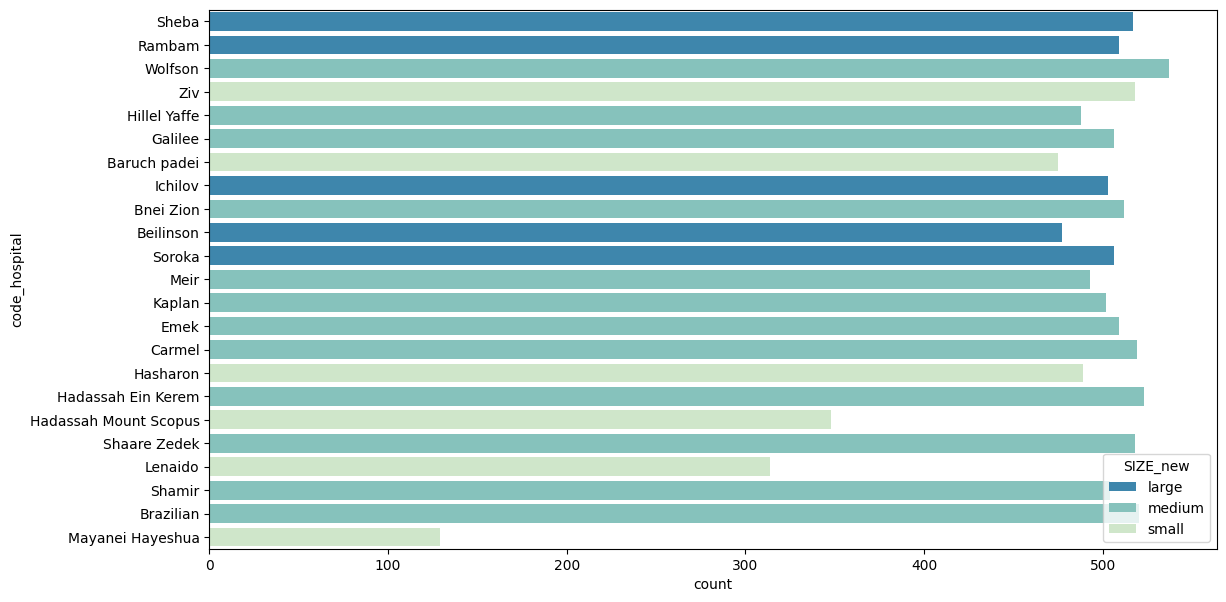

In [57]:
plt.figure(figsize=(13,7))
graph = sns.countplot(y='code_hospital', data=df, hue='SIZE_new', dodge=False, palette='GnBu_r')
graph;

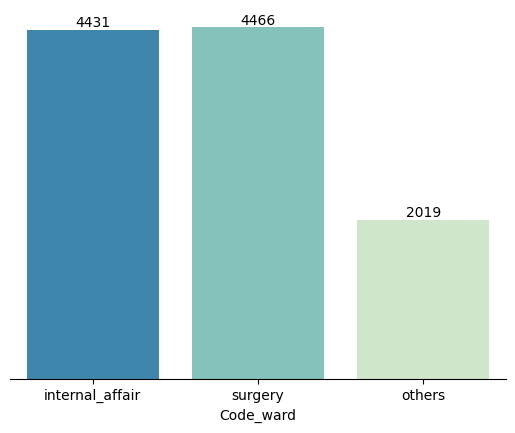

In [58]:
graph = sns.countplot(x='Code_ward', data=df, palette='GnBu_r')
graph.bar_label(graph.containers[0])
graph.get_yaxis().set_visible(False)
graph.spines['top'].set_visible(False)
graph.spines['right'].set_visible(False)
graph.spines['left'].set_visible(False)

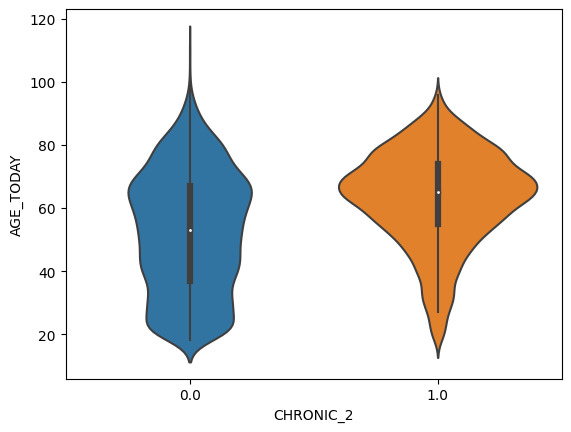

In [59]:
graph = sns.violinplot(x=df['CHRONIC_2'], y=df['AGE_TODAY'])

Translating the questions and using only important questions for graph plotting


1st imp qn found :
To what extent did you feel that the staff treating you at the hospital...

<Axes: xlabel='count', ylabel='Q13'>

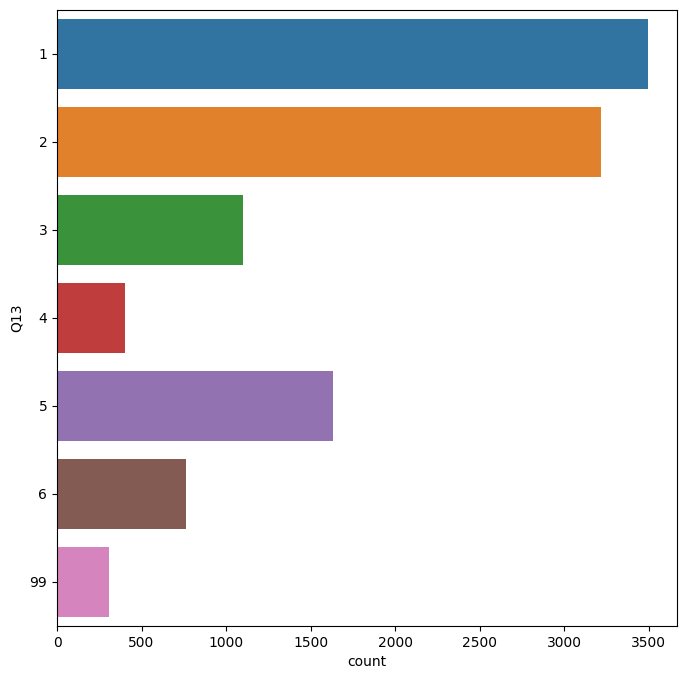

In [89]:
plt.figure(figsize=(8,8))
sns.countplot(y=df_qns['Q13'])

### It shows that atmost maximum patients are satisfied by the hospitality given by the staff

2nd imp Qn found:
To what extent were the explanations given to you during the hospitalization initiated by the department staff?

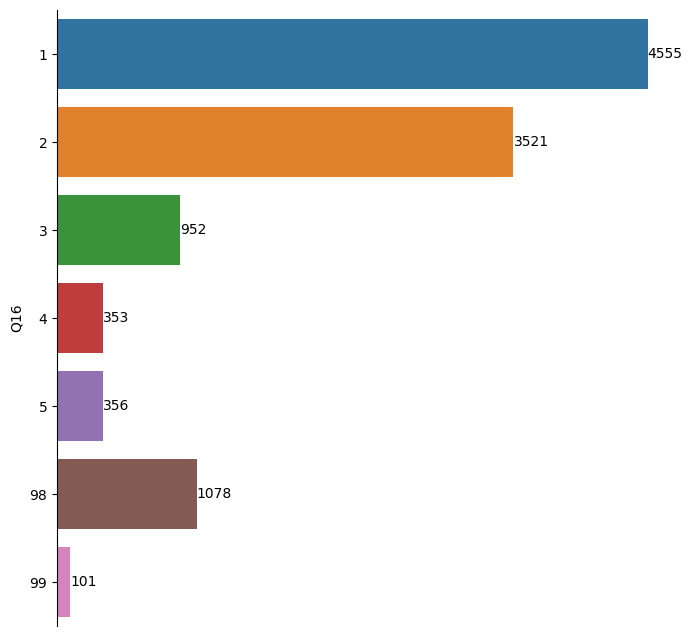

In [61]:
plt.figure(figsize=(8,8))
graph = sns.countplot(y=df_qns['Q16'])
graph.bar_label(graph.containers[0])
graph.get_xaxis().set_visible(False)
graph.spines['top'].set_visible(False)
graph.spines['right'].set_visible(False)
graph.spines['bottom'].set_visible(False)
graph;

### It shows that maximum patients siad that upto very large extent 

3rd imp Qn found :
To what extent did you feel during the hospitalization that you were treated in good hands?

<Axes: xlabel='count', ylabel='Q24'>

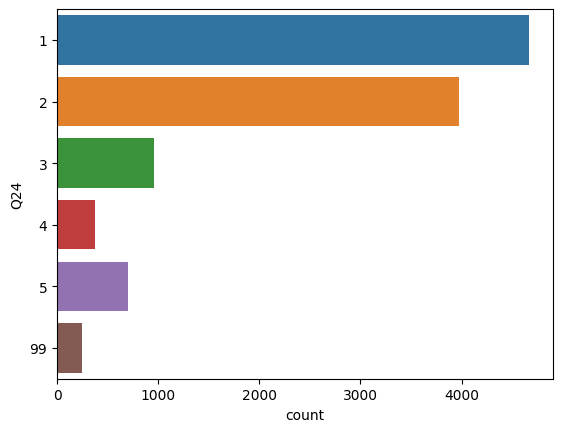

In [62]:
sns.countplot(y=df_qns['Q24'])

It shows that upto very large extents the patients feel that they are treated in good hands